In [34]:
import pandas as pd 
import numpy as np

In [35]:
# Read TSV data
df = pd.read_csv("Building_Permits.csv", )  # Or header=0 if your file has headers

C:\Users\fuath\AppData\Local\Temp\ipykernel_9372\960237942.py:2: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Building_Permits.csv", )  # Or header=0 if your file has headers


In [36]:
print(df.isnull().sum())  # Count missing values per column
print(df.info())          # Summary of data types and nulls


Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [37]:
# Find columns with missing values
null_columns = df.columns[df.isnull().any()].tolist()

# Count missing values in each null column
null_counts = df[null_columns].isnull().sum()

In [38]:
# Display result
print("Columns with missing values:")
print(null_counts)

Columns with missing values:
Street Number Suffix                      196684
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing Stories                 42784
Number of Proposed Stories                 42868
Voluntary Soft-Story Retrofit             198865
Fire Only Permit                          180073
Permit Expiration Date                     51880
Estimated Cost                             38066
Revised Cost                                6066
Existing Use                               41114
Existing Units                             51538
Proposed Use                               42439
Proposed Units                          

In [39]:
# Drop all columns that contain any NaN (missing) values
df_cleaned = df.dropna(axis=1, how='any')



In [40]:
# Preview the cleaned DataFrame
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Permit Number           198900 non-null  object
 1   Permit Type             198900 non-null  int64 
 2   Permit Type Definition  198900 non-null  object
 3   Permit Creation Date    198900 non-null  object
 4   Block                   198900 non-null  object
 5   Lot                     198900 non-null  object
 6   Street Number           198900 non-null  int64 
 7   Street Name             198900 non-null  object
 8   Current Status          198900 non-null  object
 9   Current Status Date     198900 non-null  object
 10  Filed Date              198900 non-null  object
 11  Record ID               198900 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.2+ MB
None


In [41]:
# Drop columns with any null value
df_no_null_cols = df.dropna(axis=1, how='any')

print(df_no_null_cols.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Permit Number           198900 non-null  object
 1   Permit Type             198900 non-null  int64 
 2   Permit Type Definition  198900 non-null  object
 3   Permit Creation Date    198900 non-null  object
 4   Block                   198900 non-null  object
 5   Lot                     198900 non-null  object
 6   Street Number           198900 non-null  int64 
 7   Street Name             198900 non-null  object
 8   Current Status          198900 non-null  object
 9   Current Status Date     198900 non-null  object
 10  Filed Date              198900 non-null  object
 11  Record ID               198900 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.2+ MB
None


In [42]:
# Replace common placeholders with actual NaN
df.replace(['', 'NA', 'NaN'], np.nan, inplace=True)

In [43]:

# Drop columns with any missing values
df.dropna(axis=1, how='any', inplace=True)

In [44]:
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Permit Number', 'Permit Type', 'Permit Type Definition', 'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name', 'Current Status', 'Current Status Date', 'Filed Date', 'Record ID']


In [45]:
print(df.isnull().sum())


Permit Number             0
Permit Type               0
Permit Type Definition    0
Permit Creation Date      0
Block                     0
Lot                       0
Street Number             0
Street Name               0
Current Status            0
Current Status Date       0
Filed Date                0
Record ID                 0
dtype: int64


In [46]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:

plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

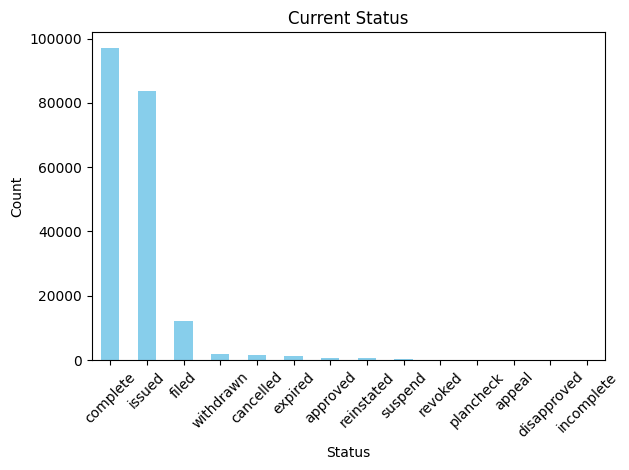

In [59]:
# Use the DataFrame df and access the column by string key
df['Current Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Current Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()